<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Discovery/blob/main/classificationModelling_circularFingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circular Fingerprint Based Classification Modeling with model interpretation



## Introduction

Extended-connectivity Circular Fingerprint is a topological fingerprint developed particularly for structure-activity modeling. It is flexible, fast while calculations, and has the ability to featurize any number of molecular features. Not only can ECFP be adapted to different use cases, its ability to represent substructures makes analysis more interpretable(Rogers & Hahn, 2010).

## Data loading and Preprocessing



In [ ]:
import multiprocessing

print("Number of CPU cores:", multiprocessing.cpu_count())

Number of CPU cores: 2


In [ ]:
# For Reporducibility
import numpy as np
np.random.seed(42)


In [ ]:
# Tpot requires numpy==1.23.3 as of june 2024
!pip install numpy==1.23.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Primary dataset

Acquisition of the primary molecular dataset of the human acetylcholinesterase inhibitor was done from ChEMBL database(ID:ChEMBL22).

In [ ]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/StandarizationOfDataset/StandarizedSmiles_cutOFF800daltonMolecularweight (1).xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


### Features Generation




Extended-connectivity Circular Fingerprint is a topological fingerprint developed particularly for structure-activity modeling. It is flexible, fast while calculations, and has the ability to featurize any number of molecular features. Not only can ECFP be adapted to different use cases, its ability to represent substructures makes analysis more interpretable(Rogers & Hahn, 2010).

Circular fingerprints encode molecular structure by considering the environment around each atom up to a specified radius. This method captures structural information that is useful for tasks such as molecular similarity searching and property prediction. The circular fingerprint featurizer from deepchem featurizer library was adopted, documentation can be found here(DeepChem, 2024):[(Source)](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html)

In [ ]:
df.to_csv('inhibitor.csv', index=False)

In [ ]:
!pip install deepchem

In [ ]:
import deepchem as dc
dataset_file = 'inhibitor.csv'
task = ['classLabel']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset = loader.create_dataset(dataset_file)

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset)
dataset = transformer.transform(dataset)

In [ ]:
dataset

<DiskDataset X.shape: (4077, 2048), y.shape: (4077, 1), w.shape: (4077, 1), task_names: ['classLabel']>

In [ ]:
pd_dataset=pd.DataFrame(dataset.X)
pd_dataset

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
# Create a dictionary to map old column names to new column names
column_rename_map = {old_column: f"fp_{old_column}" for old_column in pd_dataset.columns}

# Rename the columns
pd_dataset.rename(columns=column_rename_map, inplace=True)

In [ ]:
pd_dataset

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.concat([df, pd_dataset.loc[:, 'fp_0':]], axis=1)
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Installing RDKit from PyPI
!pip install rdkit-pypi



In [ ]:
# Drop any feature containing null values
df.dropna(axis=1)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature1=df.loc[:, 'fp_0':]

In [ ]:
feature1

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target=df['classLabel']
target.head()

0    1
1    1
2    0
3    1
4    1
Name: classLabel, dtype: int64

## AutoML Tpot Modeling

In [ ]:
!pip install tpot

In [ ]:
# Import necessary libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix,
    classification_report, precision_score, recall_score, f1_score,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)
# Create an instance of TPOTClassifier with five fold cross validation
tpot = TPOTClassifier(generations=5, population_size=20, cv=5, random_state=42, verbosity=2)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)
# Get the best pipeline from TPOT
best_pipeline = tpot.fitted_pipeline_


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8420724546453837

Generation 2 - Current best internal CV score: 0.8426873608357839

Generation 3 - Current best internal CV score: 0.8454438692584485

Generation 4 - Current best internal CV score: 0.8454438692584485

Generation 5 - Current best internal CV score: 0.8454452785163333

Best pipeline: GradientBoostingClassifier(RobustScaler(input_matrix), learning_rate=0.1, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.8)


In [ ]:
joblib.dump(best_pipeline, 'best_pipeline_tpot_circularFingerprint.pkl')


['best_pipeline_tpot_rdkit.pkl']

### Evaluation of AutoML Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             roc_auc_score, cohen_kappa_score,
                             matthews_corrcoef, accuracy_score)
from sklearn.model_selection import cross_val_score
import joblib

# Initialize a StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_test_pred = best_pipeline.predict(X_test_scaled)

# Calculate evaluation metrics
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_test_pred)
cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

# Calculate cross-validation scores, std, and 95% CI
cv_scores = cross_val_score(best_pipeline, X_train_scaled, y_train, cv=5)
cv_mean_score = np.mean(cv_scores)
cv_std = np.std(cv_scores)
cv_ci = 1.96 * cv_std  # 95% confidence interval

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Store the evaluation results
evaluation_results = {
    'Model': ['TPOT Best Pipeline'],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC-AUC': [roc_auc],
    'Cohen\'s Kappa': [cohen_kappa],
    'MCC': [mcc],
    'CV Mean Score': [cv_mean_score],
    'CV Std Dev': [cv_std],
    'CV 95% CI': [cv_ci],
    'Test Accuracy': [test_accuracy],
}

# Convert the evaluation results to a DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Save the evaluation results to an Excel file
evaluation_df.to_excel('tpot_best_pipeline_evaluation.xlsx', index=False)
print("Evaluation results of TPOT best pipeline saved to 'tpot_best_pipeline_evaluation.xlsx'.")

# Save the best model parameters to a DataFrame
best_model_parameters = pd.DataFrame([best_pipeline.get_params()])

# Combine the evaluation results, best model parameters, and feature names into a single DataFrame
results_df = pd.concat([evaluation_df, best_model_parameters], axis=1)

# Save the combined information to an Excel file
results_df.to_excel('tpot_best_pipeline_results.xlsx', index=False)
print("Evaluation results, best model parameters, and feature names saved to 'tpot_best_pipeline_results.xlsx'.")

# Print Evaluation Results
print("\nEvaluation Results:")
print(evaluation_df)

# Print Best Model Parameters
print("\nBest Model Parameters:")
print(best_model_parameters)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Evaluation results of TPOT best pipeline saved to 'tpot_best_pipeline_evaluation.xlsx'.
Evaluation results, best model parameters, and feature names saved to 'tpot_best_pipeline_results.xlsx'.

Evaluation Results:
                Model  Precision    Recall  F1 Score   ROC-AUC  Cohen's Kappa  \
0  TPOT Best Pipeline   0.846469  0.846814  0.846484  0.841698        0.68608   

        MCC  CV Mean Score  CV Std Dev  CV 95% CI  Test Accuracy  
0  0.686342       0.845445    0.014669   0.028751       0.846814  

Best Model Parameters:
  memory                                              steps  verbose  \
0   None  [(robustscaler, RobustScaler()), (gradientboos...    False   

     robustscaler                         gradientboostingclassifier  \
0  RobustScaler()  ([DecisionTreeRegressor(criterion='friedman_ms...   

   robustscaler__copy robustscaler__quantile_range  \
0                True                 (25.0, 75.0)   

   robustscaler__unit_variance  robustscaler__with_centering  \
0 

## Aggregrate modelling with hyperparameter optimization and evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    matthews_corrcoef,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    StackingClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import joblib

# Store feature names
feature_names = feature1.columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.2, random_state=42)

# Use StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of models to loop through
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(solver='sag'),
    'SVM': SVC(probability=True),
    'MLP': MLPClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Stacking': StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())], final_estimator=LogisticRegression()),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100),
    'HistGradientBoosting': HistGradientBoostingClassifier(max_iter=100)
}

# Define hyperparameters for Grid Search
param_grid = {
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Logistic Regression': {'C': [0.1, 1]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Naive Bayes': {},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    'Bagging': {},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Stacking': {},
    'Extra Trees': {'n_estimators': [100, 200, 300]},
    'HistGradientBoosting': {'max_iter': [100, 200, 300]}
}

# Initialize variables to track the best model and its evaluation metrics
best_models_results = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC-AUC': [],
    'Cohen\'s Kappa': [],
    'MCC': [],
    'Best Parameters': [],
    'CV Mean Score': [],
    'CV Std Dev': [],
    'CV 95% CI': [],
    'Features': []
}

# Initialize variables for the best single model
best_single_model = None
best_single_model_name = None
best_single_model_roc_auc = 0.0
best_single_model_precision = 0.0
best_single_model_recall = 0.0
best_single_model_f1_score = 0.0
best_single_model_cohen_kappa = 0.0
best_single_model_mcc = 0.0
best_single_model_parameters = None
best_single_model_cv_mean_score = 0.0
best_single_model_cv_std_dev = 0.0
best_single_model_cv_ci = 0.0
best_single_model_features = None

# Loop through each model, perform Grid Search, calculate metrics, and create visualizations
for model_name, model in models.items():
    if model_name in param_grid:
        # Perform Grid Search for hyperparameter optimization
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='roc_auc')
        grid_search.fit(X_train_scaled, y_train)
        current_best_model = grid_search.best_estimator_
        current_best_hyperparameters = grid_search.best_params_
    else:
        current_best_model = model

    # Calculate cross-validation score
    cv_scores = cross_val_score(current_best_model, X_train_scaled, y_train, cv=5)
    cv_mean_score = cv_scores.mean()
    cv_std_dev = cv_scores.std()
    cv_ci = 1.96 * cv_std_dev  # 95% confidence interval

    # Train the current best model on the full training data
    current_best_model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_test_pred = current_best_model.predict(X_test_scaled)

    # Calculate evaluation metrics for test set
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_test_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Print evaluation results for each model
    print("\nModel:", model_name)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("Cohen's Kappa:", cohen_kappa)
    print("MCC:", mcc)
    print("Best Parameters:", current_best_hyperparameters)
    print("CV Mean Score:", cv_mean_score)
    print("CV Std Dev:", cv_std_dev)
    print("CV 95% CI:", cv_ci)
    print("Features:", feature_names)

    # Store the results of the best model for each classifier
    best_models_results['Model'].append(model_name)
    best_models_results['Precision'].append(precision)
    best_models_results['Recall'].append(recall)
    best_models_results['F1 Score'].append(f1)
    best_models_results['ROC-AUC'].append(roc_auc)
    best_models_results['Cohen\'s Kappa'].append(cohen_kappa)
    best_models_results['MCC'].append(mcc)
    best_models_results['Best Parameters'].append(current_best_hyperparameters)
    best_models_results['CV Mean Score'].append(cv_mean_score)
    best_models_results['CV Std Dev'].append(cv_std_dev)
    best_models_results['CV 95% CI'].append(cv_ci)
    best_models_results['Features'].append(feature_names)

    # Update the best single model if the current model has a higher ROC-AUC score
    if roc_auc > best_single_model_roc_auc:
        best_single_model_roc_auc = roc_auc
        best_single_model_name = model_name
        best_single_model_precision = precision
        best_single_model_recall = recall
        best_single_model_f1_score = f1
        best_single_model_cohen_kappa = cohen_kappa
        best_single_model_mcc = mcc
        best_single_model_parameters = current_best_hyperparameters
        best_single_model_cv_mean_score = cv_mean_score
        best_single_model_cv_std_dev = cv_std_dev
        best_single_model_cv_ci = cv_ci
        best_single_model_features = feature_names
        best_single_model = current_best_model

# Convert the dictionary to a DataFrame
best_models_df = pd.DataFrame(best_models_results)

# Print the results
print("\nBest Models Results:")
print(best_models_df)

# Save the DataFrame to an Excel file
best_models_df.to_excel('best_models_results.xlsx', index=False)
print("Best models results saved to 'best_models_results.xlsx'.")

# Save the results of the best single model to a separate Excel file
best_single_model_results = {
    'Model': [best_single_model_name],
    'Precision': [best_single_model_precision],
    'Recall': [best_single_model_recall],
    'F1 Score': [best_single_model_f1_score],
    'ROC-AUC': [best_single_model_roc_auc],
    'Cohen\'s Kappa': [best_single_model_cohen_kappa],
    'MCC': [best_single_model_mcc],
    'Best Parameters': [best_single_model_parameters],
    'CV Mean Score': [best_single_model_cv_mean_score],
    'CV Std Dev': [best_single_model_cv_std_dev],
    'CV 95% CI': [best_single_model_cv_ci],
    'Features': [best_single_model_features]
}

best_single_model_df = pd.DataFrame(best_single_model_results)

# Print the results of the best single model
print("\nBest Single Model Results:")
print(best_single_model_df)

# Save the DataFrame to an Excel file
best_single_model_df.to_excel('best_single_model_results.xlsx', index=False)
print("\nBest single model results saved to 'best_single_model_results_optimized.xlsx'.")

# Save the trained model of the best single model to a file
joblib.dump(best_single_model, 'best_single_model.pkl')
print("\nTrained model of the best single model saved to 'best_single_model.pkl'.")



Model: Random Forest
Precision: 0.8649544094786482
Recall: 0.8651960784313726
F1 Score: 0.8649904987207034
ROC-AUC: 0.8609932556713673
Cohen's Kappa: 0.7240463366044418
MCC: 0.7241921960351086
Best Parameters: {'n_estimators': 300}
CV Mean Score: 0.8491271996166819
CV Std Dev: 0.014427206578099556
CV 95% CI: 0.028277324893075127
Features: ['fp_0', 'fp_1', 'fp_2', 'fp_3', 'fp_4', 'fp_5', 'fp_6', 'fp_7', 'fp_8', 'fp_9', 'fp_10', 'fp_11', 'fp_12', 'fp_13', 'fp_14', 'fp_15', 'fp_16', 'fp_17', 'fp_18', 'fp_19', 'fp_20', 'fp_21', 'fp_22', 'fp_23', 'fp_24', 'fp_25', 'fp_26', 'fp_27', 'fp_28', 'fp_29', 'fp_30', 'fp_31', 'fp_32', 'fp_33', 'fp_34', 'fp_35', 'fp_36', 'fp_37', 'fp_38', 'fp_39', 'fp_40', 'fp_41', 'fp_42', 'fp_43', 'fp_44', 'fp_45', 'fp_46', 'fp_47', 'fp_48', 'fp_49', 'fp_50', 'fp_51', 'fp_52', 'fp_53', 'fp_54', 'fp_55', 'fp_56', 'fp_57', 'fp_58', 'fp_59', 'fp_60', 'fp_61', 'fp_62', 'fp_63', 'fp_64', 'fp_65', 'fp_66', 'fp_67', 'fp_68', 'fp_69', 'fp_70', 'fp_71', 'fp_72', 'fp_73', '

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 


Model: Logistic Regression
Precision: 0.8254049627439961
Recall: 0.8223039215686274
F1 Score: 0.8229529274377037
ROC-AUC: 0.8234396076026979
Cohen's Kappa: 0.6407272903938882
MCC: 0.6421659033473064
Best Parameters: {'C': 0.1}
CV Mean Score: 0.8258157254389837
CV Std Dev: 0.018305947897596313
CV 95% CI: 0.03587965787928877
Features: ['fp_0', 'fp_1', 'fp_2', 'fp_3', 'fp_4', 'fp_5', 'fp_6', 'fp_7', 'fp_8', 'fp_9', 'fp_10', 'fp_11', 'fp_12', 'fp_13', 'fp_14', 'fp_15', 'fp_16', 'fp_17', 'fp_18', 'fp_19', 'fp_20', 'fp_21', 'fp_22', 'fp_23', 'fp_24', 'fp_25', 'fp_26', 'fp_27', 'fp_28', 'fp_29', 'fp_30', 'fp_31', 'fp_32', 'fp_33', 'fp_34', 'fp_35', 'fp_36', 'fp_37', 'fp_38', 'fp_39', 'fp_40', 'fp_41', 'fp_42', 'fp_43', 'fp_44', 'fp_45', 'fp_46', 'fp_47', 'fp_48', 'fp_49', 'fp_50', 'fp_51', 'fp_52', 'fp_53', 'fp_54', 'fp_55', 'fp_56', 'fp_57', 'fp_58', 'fp_59', 'fp_60', 'fp_61', 'fp_62', 'fp_63', 'fp_64', 'fp_65', 'fp_66', 'fp_67', 'fp_68', 'fp_69', 'fp_70', 'fp_71', 'fp_72', 'fp_73', 'fp_74'

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Model: AdaBoost
Precision: 0.7828051542254328
Recall: 0.7818627450980392
F1 Score: 0.7822159660356763
ROC-AUC: 0.7791416309012875
Cohen's Kappa: 0.5563049853372435
MCC: 0.5564778930996462
Best Parameters: {'n_estimators': 200}
CV Mean Score: 0.8086467366284914
CV Std Dev: 0.01117647803062995
CV 95% CI: 0.0219058969400347
Features: ['fp_0', 'fp_1', 'fp_2', 'fp_3', 'fp_4', 'fp_5', 'fp_6', 'fp_7', 'fp_8', 'fp_9', 'fp_10', 'fp_11', 'fp_12', 'fp_13', 'fp_14', 'fp_15', 'fp_16', 'fp_17', 'fp_18', 'fp_19', 'fp_20', 'fp_21', 'fp_22', 'fp_23', 'fp_24', 'fp_25', 'fp_26', 'fp_27', 'fp_28', 'fp_29', 'fp_30', 'fp_31', 'fp_32', 'fp_33', 'fp_34', 'fp_35', 'fp_36', 'fp_37', 'fp_38', 'fp_39', 'fp_40', 'fp_41', 'fp_42', 'fp_43', 'fp_44', 'fp_45', 'fp_46', 'fp_47', 'fp_48', 'fp_49', 'fp_50', 'fp_51', 'fp_52', 'fp_53', 'fp_54', 'fp_55', 'fp_56', 'fp_57', 'fp_58', 'fp_59', 'fp_60', 'fp_61', 'fp_62', 'fp_63', 'fp_64', 'fp_65', 'fp_66', 'fp_67', 'fp_68', 'fp_69', 'fp_70', 'fp_71', 'fp_72', 'fp_73', 'fp_74', 

## Cross species evaluation

### Upload and prep for species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.



In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_humanIndependent.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_eel.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_mouse.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_cow.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_ray.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_mosquito.xlsx')

In [ ]:
df_humanIndependent

,CdId,Structure,Mol Weight,Formula,index,PMID,Chemical Name,Smiles,Standard Value,Standard Units,Standard Relation,Unnamed: 6,Unnamed: 7,InChi,MW,standardized_Standard Units,neg_log_M_Standard Valuemean,binary_activities,cleanedMol
0,1,NaN,400.950,C23H29ClN2O2,0,PMID31316368,1-(4-Amino-5-chloro-2-methoxyphenyl)-3-(1-(3-m...,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1,161,nM,'=',NaN,NaN,MLGZODWUOIZOPO-UHFFFAOYSA-N,400.191756,nm,7.132772,1,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1
1,2,NaN,582.793,C35H46N6O2,1,PMID32932702,13-bis[5-(o-cyanobenzylethylamino)pentyl]-6-me...,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...,7.3,nM,'=',NaN,NaN,HSTIQTQFKBPUBM-UHFFFAOYSA-N,582.368225,nm,8.453114,1,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...
2,3,NaN,610.847,C37H50N6O2,2,PMID32932702,13-bis[6-(o-cyanobenzylethylamino)hexyl]-6-met...,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...,29,nM,'=',NaN,NaN,VZLMPEWEWNBPNU-UHFFFAOYSA-N,610.399525,nm,7.578695,1,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...
3,4,NaN,618.826,C38H46N6O2,3,PMID32932702,13-bis[5-(o-cyanobenzylethylamino)pentyl]-quin...,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...,38,nM,'=',NaN,NaN,MUHGJDAKOZGKRH-UHFFFAOYSA-N,618.368225,nm,7.378729,1,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...
4,5,NaN,213.303,C14H17N2,4,PMID29534488,9-Amino-1234-tetrahydro-10-methylacridin-10-iu...,C[n+]1c2c(c(N)c3ccccc31)CCCC2,12,µM,'=',NaN,NaN,XZCXCNCLCXZILU-UHFFFAOYSA-O,213.138625,um,4.920819,0,C[n+]1c2c(c(N)c3ccccc31)CCCC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,204,NaN,427.504,C26H25N3O3,211,PMID31852270,N-(4-((Benzyl(methyl)amino)methyl)phenyl)-7-me...,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...,2.3,µM,'=',NaN,NaN,RISZPUMPOOHFSR-UHFFFAOYSA-N,427.189592,um,5.638272,0,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...
204,205,NaN,457.530,C27H27N3O4,212,PMID31852270,N-(4-((benzyl(methyl)amino)methyl)phenyl)-67-d...,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...,4.5,µM,'=',NaN,NaN,PHAZELHZUUHUTB-UHFFFAOYSA-N,457.200156,um,5.346787,0,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...
205,206,NaN,554.739,C33H42N6O2,213,PMID32932702,13-bis[4-(o-cyanobenzylethylamino)butyl]-6-met...,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...,7,nM,'=',fixed,NaN,HWHRMPMHFDVNAP-UHFFFAOYSA-N,554.336925,nm,8.154902,1,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...
206,207,NaN,526.685,C31H38N6O2,214,PMID32932702,13-bis[5-(o-cyanobenzylamino)pentyl]-6-methylu...,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...,480,nM,'=',NaN,NaN,LCCSXIJDKYAOER-UHFFFAOYSA-N,526.305624,nm,6.318759,1,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...


In [ ]:
df_humanIndependent=df_humanIndependent[['Smiles',	'binary_activities',	'cleanedMol']]

In [ ]:
df_humanIndependent.rename(columns={'binary_activities': 'single-class-label'}, inplace=True)

<ipython-input-29-e096e6f94345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_humanIndependent.rename(columns={'binary_activities': 'single-class-label'}, inplace=True)


### Featurization of species datasets

In [ ]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_HumanIndependent.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_HumanIndependent = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_HumanIndependent)
dataset_HumanIndependent = transformer.transform(dataset_HumanIndependent)

In [ ]:
dataset_file = 'inhibitor_eel.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_eel = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_eel)
dataset_eel = transformer.transform(dataset_eel)

In [ ]:
dataset_file = 'inhibitor_mouse.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mouse = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mouse)
dataset_mouse = transformer.transform(dataset_mouse)

In [ ]:
dataset_file = 'inhibitor_ray.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_ray = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_ray)
dataset_ray = transformer.transform(dataset_ray)

In [ ]:
dataset_file = 'inhibitor_cow.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_cow = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_cow)
dataset_cow = transformer.transform(dataset_cow)

In [ ]:
dataset_file = 'inhibitor_mosquito.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mosquito = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mosquito)
dataset_mosquito = transformer.transform(dataset_mosquito)

### Test dataset preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)


In [ ]:
X_test

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2685,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df_= pd.merge(df[['cleanedMol','classLabel','IC50']], X_test, left_index=True, right_index=True, how='inner')

In [ ]:
test_df_.rename(columns={'classLabel': 'single-class-label'}, inplace=True)

In [ ]:
test_df_

,cleanedMol,single-class-label,IC50,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
6,Nc1c2c(nc3ccccc13)CCCC2,1,45.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,1,5.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,0,1820.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,0,10000.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,0,433000.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,0,1020.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4064,CNc1nc(NCCc2ccccc2)c2ccccc2n1,0,8700.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4070,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,0,18550.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4071,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,1,79.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df_.to_csv('inhibitor_test.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_test.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
test_dataset = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=test_dataset)
test_dataset = transformer.transform(test_dataset)

In [ ]:
test_dataset

<DiskDataset X.shape: (816, 2048), y.shape: (816, 1), w.shape: (816, 1), ids: ['Nc1c2c(nc3ccccc13)CCCC2' 'O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2'
 'COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1' ...
 'CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)[C@H]1O'
 'O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21'
 'COc1cccc2cc[n+](-c3ccc(C)cc3)cc12'], task_names: ['single-class-label']>

### Evaulation of cross species dataset on tpot's best pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Confusion Matrix for Human Test dataset:
[[407  59]
 [ 59 291]]
Confusion Matrix for Human Independent dataset:
[[118  20]
 [ 34  36]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Confusion Matrix for Eel dataset:
[[2966  409]
 [ 971 1113]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Confusion Matrix for Mouse dataset:
[[186  37]
 [ 24 121]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Confusion Matrix for Cow dataset:
[[163  55]
 [ 34 205]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Confusion Matrix for Ray dataset:
[[549 170]
 [311 376]]
Confusion Matrix for Mosquito dataset:
[[44  1]
 [12 15]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


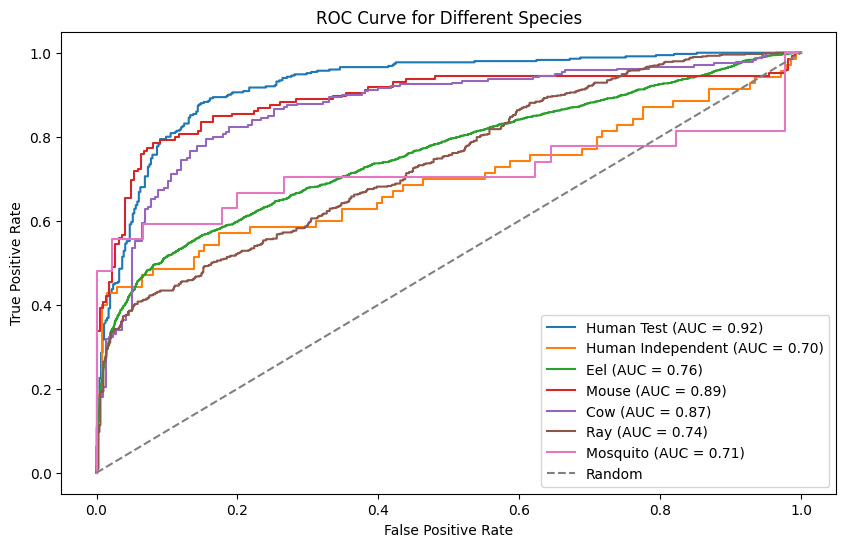

Evaluation for Human Test dataset:
Accuracy: 0.8554
Precision: 0.8314
Recall: 0.8314
F1 Score: 0.8314
MCC: 0.7048
Cohen's Kappa: 0.7048
Predicted Positives: 350.0000
Predicted Negatives: 466.0000


Evaluation for Human Independent dataset:
Accuracy: 0.7404
Precision: 0.6429
Recall: 0.5143
F1 Score: 0.5714
MCC: 0.3935
Cohen's Kappa: 0.3885
Predicted Positives: 56.0000
Predicted Negatives: 152.0000


Evaluation for Eel dataset:
Accuracy: 0.7472
Precision: 0.7313
Recall: 0.5341
F1 Score: 0.6173
MCC: 0.4473
Cohen's Kappa: 0.4353
Predicted Positives: 1522.0000
Predicted Negatives: 3937.0000


Evaluation for Mouse dataset:
Accuracy: 0.8342
Precision: 0.7658
Recall: 0.8345
F1 Score: 0.7987
MCC: 0.6600
Cohen's Kappa: 0.6582
Predicted Positives: 158.0000
Predicted Negatives: 210.0000


Evaluation for Cow dataset:
Accuracy: 0.8053
Precision: 0.7885
Recall: 0.8577
F1 Score: 0.8216
MCC: 0.6106
Cohen's Kappa: 0.6080
Predicted Positives: 260.0000
Predicted Negatives: 197.0000


Evaluation for Ray da

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming you have a dictionary of datasets
datasets = {
    'Human Test':test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    scaler = StandardScaler()

    # Assuming data.X is a 2D array (matrix)
    X = data.X
    y = data.y

    # Get predicted probabilities for each class
    y_probs = best_pipeline.predict_proba(X)

    # Extract probabilities for each class
    y_prob_negative = y_probs[:, 0]  # Probability for the negative class
    y_prob_positive = y_probs[:, 1]  # Probability for the positive class

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y, y_prob_positive)
    roc_auc = auc(fpr, tpr)

    # Evaluate the model
    y_pred = best_pipeline.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    cohen_kappa = cohen_kappa_score(y, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)

    # Include predicted positives and negatives
    predicted_positives = sum(y_pred == 1)
    predicted_negatives = sum(y_pred == 0)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa,
        'Predicted Positives': predicted_positives,
        'Predicted Negatives': predicted_negatives
    }

    # Store the predictions, true labels, and probabilities in a DataFrame
    df_predictions_species = pd.DataFrame({
        'True_Labels': y.flatten(),
        'Predictions': y_pred.flatten(),
        'Probabilities_Negative': y_prob_negative.flatten(),
        'Probabilities_Positive': y_prob_positive.flatten()
    })

    # Reset the index to start from 0
    df_predictions_species.reset_index(drop=True, inplace=True)

    # Save the DataFrame to an Excel file
    df_predictions_species.to_excel(f'{species}_tpot_predictions_data.xlsx', index_label='Index')

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(cm)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_tpot.xlsx', index_label='Species')


### Evaulation of cross species dataset on best model from aggregrate modeling

Confusion Matrix for Human Test dataset:
[[414  52]
 [ 60 290]]
Confusion Matrix for Human Independent dataset:
[[128  10]
 [ 34  36]]
Confusion Matrix for Eel dataset:
[[2958  417]
 [1083 1001]]
Confusion Matrix for Mouse dataset:
[[192  31]
 [ 50  95]]
Confusion Matrix for Cow dataset:
[[201  17]
 [ 87 152]]
Confusion Matrix for Ray dataset:
[[614 105]
 [378 309]]
Confusion Matrix for Mosquito dataset:
[[37  8]
 [10 17]]


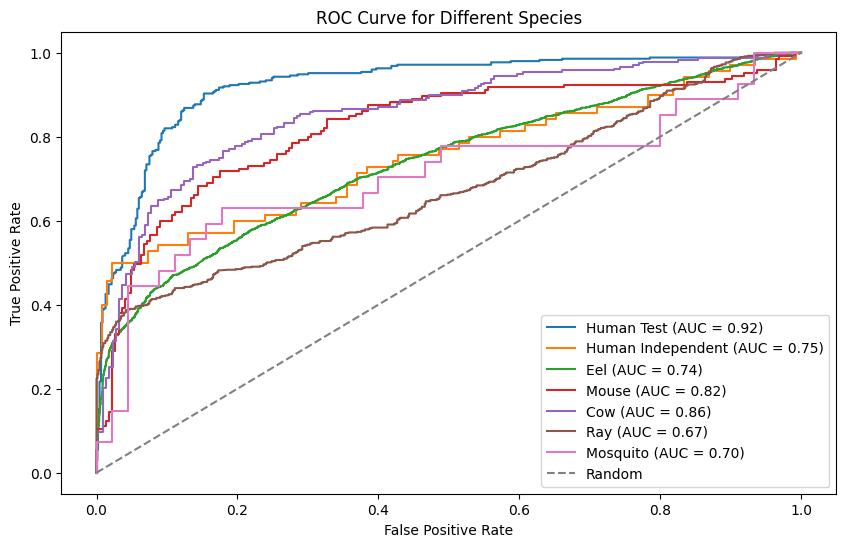

Evaluation for Human Test dataset:
Accuracy: 0.8627
Precision: 0.8480
Recall: 0.8286
F1 Score: 0.8382
MCC: 0.7192
Cohen's Kappa: 0.7190
Predicted Positives: 342.0000
Predicted Negatives: 474.0000


Evaluation for Human Independent dataset:
Accuracy: 0.7885
Precision: 0.7826
Recall: 0.5143
F1 Score: 0.6207
MCC: 0.5030
Cohen's Kappa: 0.4826
Predicted Positives: 46.0000
Predicted Negatives: 162.0000


Evaluation for Eel dataset:
Accuracy: 0.7252
Precision: 0.7059
Recall: 0.4803
F1 Score: 0.5717
MCC: 0.3953
Cohen's Kappa: 0.3800
Predicted Positives: 1418.0000
Predicted Negatives: 4041.0000


Evaluation for Mouse dataset:
Accuracy: 0.7799
Precision: 0.7540
Recall: 0.6552
F1 Score: 0.7011
MCC: 0.5315
Cohen's Kappa: 0.5283
Predicted Positives: 126.0000
Predicted Negatives: 242.0000


Evaluation for Cow dataset:
Accuracy: 0.7724
Precision: 0.8994
Recall: 0.6360
F1 Score: 0.7451
MCC: 0.5773
Cohen's Kappa: 0.5502
Predicted Positives: 169.0000
Predicted Negatives: 288.0000


Evaluation for Ray da

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming you have a dictionary of datasets
datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    scaler = StandardScaler()

    # Assuming data.X is a 2D array (matrix)
    X = scaler.fit_transform(data.X)
    y = data.y

    # Get predicted probabilities for each class
    y_probs = best_single_model.predict_proba(X)

    # Extract probabilities for each class
    y_prob_negative = y_probs[:, 0]  # Probability for the negative class
    y_prob_positive = y_probs[:, 1]  # Probability for the positive class

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y, y_prob_positive)
    roc_auc = auc(fpr, tpr)

    # Evaluate the model
    y_pred = best_single_model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    cohen_kappa = cohen_kappa_score(y, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)

    # Include predicted positives and negatives
    predicted_positives = sum(y_pred == 1)
    predicted_negatives = sum(y_pred == 0)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa,
        'Predicted Positives': predicted_positives,
        'Predicted Negatives': predicted_negatives
    }

    # Store the predictions, true labels, and probabilities in a DataFrame
    df_predictions_species = pd.DataFrame({
        'True_Labels': y.flatten(),
        'Predictions': y_pred.flatten(),
        'Probabilities_Negative': y_prob_negative.flatten(),
        'Probabilities_Positive': y_prob_positive.flatten()
    })

    # Reset the index to start from 0
    df_predictions_species.reset_index(drop=True, inplace=True)

    # Save the DataFrame to an Excel file
    df_predictions_species.to_excel(f'{species}_optimized_predictions_data.xlsx', index_label='Index')

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(cm)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_optimized.xlsx', index_label='Species')


In [ ]:
best_single_model

SVC(C=1, probability=True)

In [ ]:
best_pipeline

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=10, max_features=0.5,
                                            min_samples_split=13,
                                            random_state=42, subsample=0.8))])

In [ ]:
joblib.dump(best_pipeline, 'bestPipeline_tpot_circularfingerprint_classification.pkl')


['bestPipeline_tpot_circularfingerprint_classification.pkl']

In [ ]:
joblib.dump(best_single_model, 'bestModel_aggregrate_circularfingerprint_classification.pkl')


['bestModel_aggregrate_circularfingerprint_classification.pkl']

##Model Interpretation(LIME interpreation and fragment contributions visualization)

The capacity of deep and machine learning models to discern intricate, nonlinear links between inputs and outputs, while impressive, also presents a challenge: these processes often remain opaque to human understanding. In the realm of drug design and discovery,  Explainable AI( XAI) has the potential to significantly enhance our understanding of the intricacies involved in error occurrences, non-linear responses, and seemingly random phenomena. Furthermore, the critical role of explainable AI lies in its ability to elucidate the connection between a drug's structural features and its pharmacological effects, identifying crucial elements for informed drug design and discovery(Jiménez-Luna et al., 2020).

The Extended Circular Fingerprints (ECFP)(Rogers & Hahn, 2010), a topological fingerprint designed specifically for QSAR modeling, in conjunction with Local Interpretable Model-agnostic Explanations (LIME)(Ribeiro et al., 2016), which examines local perturbations to deduce feature importance, will enable us to pinpoint significant fragments within a structure that are crucial for specific predictions(Ramsundar et al., 2019)

The whole method is adopted from the deep chem tutorial, can be found here: [colab notebook](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Model_Interpretability.ipynb)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=84c3900722f9763d5d4f6c73e68fbe4556537311cd0641d74fbf95bd942fd151
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)

In [ ]:
X_train

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
3323,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2399,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1064,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature_names= X_train.columns.tolist()

In [ ]:
len(feature_names)

2048

In [ ]:
len(X_train.values)

3261

In [ ]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              feature_names=feature_names,
                                              categorical_features=feature_names,
                                              class_names=['0', '1'],
                                              discretize_continuous=True)

In [ ]:
def eval_model(my_model):
    def eval_closure(x):
        predictions = my_model.predict_proba(x)
        return predictions
    return eval_closure
model_fn = eval_model(best_single_model)

In [ ]:
# Define a function that creates an evaluator for a given model.
def evaluate_model(model):
    # Define a closure that takes input data and returns predictions using the provided model.
    def evaluate_closure(input_data):
        predictions = model.predict_proba(input_data)
        return predictions
    # Return the closure that encapsulates the evaluation function.
    return evaluate_closure

# Create an evaluator for the best single model.
best_model_evaluator = evaluate_model(best_single_model)


In [ ]:
best_model_evaluator

<function __main__.eval_model.<locals>.eval_closure(x)>

In [ ]:
test_df_.loc[:,'fp_0': ]

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4070,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4071,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
best_pipeline.predict_proba(test_dataset.X)[:]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array([[0.08873704, 0.91126296],
       [0.03086049, 0.96913951],
       [0.47407126, 0.52592874],
       ...,
       [0.97439482, 0.02560518],
       [0.30079327, 0.69920673],
       [0.33045889, 0.66954111]])

In [ ]:
test_dataset.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


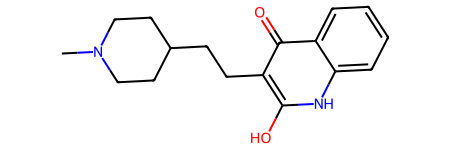

In [ ]:
from rdkit import Chem
positive_id = np.where((test_dataset.y[:,0] == 1) * (best_pipeline.predict_proba(test_dataset.X)[:,0] > 0.8))[0][0]
Chem.MolFromSmiles(test_dataset.ids[positive_id])

In [ ]:
X_train.values

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_dataset.X[positive_id]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
explain = explainer.explain_instance(test_dataset.X[positive_id], best_model_evaluator, num_features=100, top_labels=1)

In [ ]:
explain.show_in_notebook(show_table=True, show_all=False)

In [ ]:
def generate_circular_fingerprint_dict(molecule, fp_length=1024):

    fingerprint_dict = {}  # Initialize an empty dictionary to store results
    featurizer = dc.feat.CircularFingerprint(sparse=True, smiles=True, size=1024)  # Initialize CircularFingerprint featurizer
    fingerprint_features = featurizer._featurize(molecule)  # Compute fingerprint features for the molecule
    for key, value in fingerprint_features.items():
        index = key % fp_length  # Compute the index within the fingerprint length
        if index not in fingerprint_dict:
            fingerprint_dict[index] = set()  # Initialize a set if index is not yet in dictionary
        fingerprint_dict[index].add(value['smiles'])  # Add SMILES string to the corresponding index's set
    return fingerprint_dict

# Determine which fragments activate which fingerprints in our active molecule
fragments_activations = generate_circular_fingerprint_dict(Chem.MolFromSmiles(test_dataset.ids[positive_id]))

In [ ]:
print(explain.as_map())

{1: [(973, -0.02188035279702942), (276, -0.019835620395864784), (302, 0.01980883071845576), (260, 0.019648877376195393), (408, -0.01928567477288118), (650, 0.019060317139556335), (2017, -0.01866387480896589), (984, -0.018371528417830577), (800, 0.017854744923580326), (1564, -0.017780329770971073), (1273, 0.017769417972366485), (304, -0.017403019346182175), (1371, -0.017180295032518573), (1666, -0.01641477634306573), (1450, -0.016142112403559537), (712, -0.016107415022838575), (5, 0.016077254061825065), (1050, -0.015836094416558904), (1355, -0.0155500873223087), (832, 0.015516710073868853), (1002, -0.015428509596801003), (1756, -0.015369619685372968), (1250, 0.01531989051108718), (605, -0.015105334501187107), (115, -0.01507177424750649), (1143, -0.014850907929179893), (1653, -0.014642800154453685), (1933, -0.014521581466064441), (784, -0.014396598852906357), (231, -0.014101469397734163), (592, -0.014045967170437195), (1931, 0.013911395525488646), (791, -0.013881110674762998), (85, -0.01

In [ ]:
fragment_weight = dict(explain.as_map()[1])

In [ ]:
for index in fragments_activations:
    if index in fragment_weight:
        print(index, fragments_activations[index], fragment_weight[index])

114 {'CCC(CC)CC'} 0.011138059426737103
650 {''} 0.019060317139556335
832 {'CCC'} 0.015516710073868853
29 {'CC(C)C'} 0.01367950533651582
800 {'CC(C)CCN'} 0.017854744923580326
926 {''} 0.011349210299112001
1019 {''} 0.011278073908631649


In [ ]:
import pandas as pd

# Initialize an empty list to store dictionaries
data = []

# Iterate over the keys in fragments_activations
for index in fragments_activations:
    # Check if the index exists in fragment_weight
    if index in fragment_weight:
        # Create a dictionary with index, fragments_activations value, and fragment_weight value
        data.append({'Index': index, 'fragments_activations': fragments_activations[index], 'Fragment_Weight': fragment_weight[index]})

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Index,My_Fragments,Fragment_Weight
0,114,{CCC(CC)CC},0.011138
1,650,{},0.019060
2,832,{CCC},0.015517
3,29,{CC(C)C},0.013680
4,800,{CC(C)CCN},0.017855
5,926,{},0.011349
6,1019,{},0.011278


In [ ]:
from rdkit import Chem

# Define a function to convert SMILES string to RDKit molecule object
def smiles_to_mol(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol
    except:
        return None

# Assuming df is your DataFrame
df['Molecule'] = df['fragments_activations'].apply(smiles_to_mol)

# Display the DataFrame
df


,Index,My_Fragments,Fragment_Weight,Molecule
0,114,{CCC(CC)CC},0.011138,None
1,650,{},0.019060,None
2,832,{CCC},0.015517,None
3,29,{CC(C)C},0.013680,None
4,800,{CC(C)CCN},0.017855,None
5,926,{},0.011349,None
6,1019,{},0.011278,None


In [ ]:
def extract_fragments(smiles_set):
    fragments = []
    for smiles in smiles_set:
        # Remove curly brackets
        smiles = smiles.strip('{}')
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fragments.extend(Chem.GetMolFrags(mol, asMols=True))
    return fragments

# Extract fragments from 'fragments_activations' column
fragments_list = df['fragments_activations'].apply(lambda x: set(x)).apply(extract_fragments)

# Flatten the list of lists into a single list
fragments = [fragment for sublist in fragments_list for fragment in sublist]

# Remove duplicate fragments
unique_fragments = list(set(fragments))

# Display unique fragments
for idx, fragment in enumerate(unique_fragments):
    print(f"Fragment {idx+1}: {Chem.MolToSmiles(fragment)}")

Fragment 1: CC(C)CCN
Fragment 2: CC(C)C
Fragment 3: CCC(CC)CC
Fragment 4: CCC


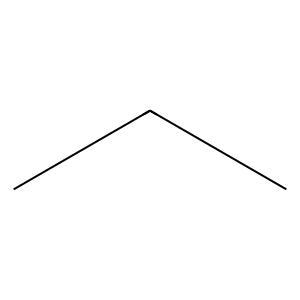

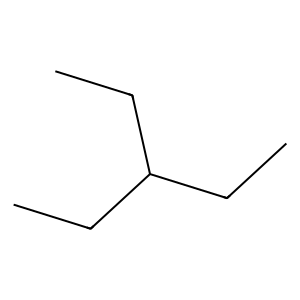

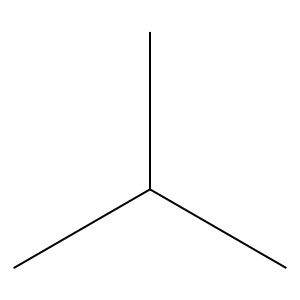

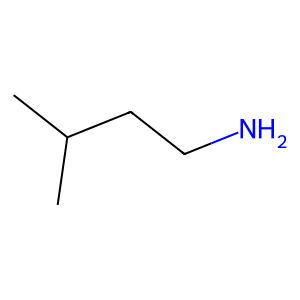

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
# Function to extract fragments from a SMILES string enclosed within curly brackets
def extract_fragments(smiles_set):
    fragments = []
    for smiles in smiles_set:
        # Remove curly brackets
        smiles = smiles.strip('{}')
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fragments.extend(Chem.GetMolFrags(mol, asMols=True))
    return fragments

# Extract fragments from 'fragments_activations' column
fragments_list = df['fragments_activations'].apply(lambda x: set(x)).apply(extract_fragments)

# Flatten the list of lists into a single list
fragments = [fragment for sublist in fragments_list for fragment in sublist]

# Remove duplicate fragments
unique_fragments = list(set(fragments))

# Generate images of fragment structures
fragment_images = [Draw.MolToImage(fragment) for fragment in unique_fragments]

# Display images of fragment structures
for idx, image in enumerate(fragment_images):
    display(image)


In [ ]:
test_dataset.ids[active_id]

'CN1CCC(CCc2c(O)[nH]c3ccccc3c2=O)CC1'

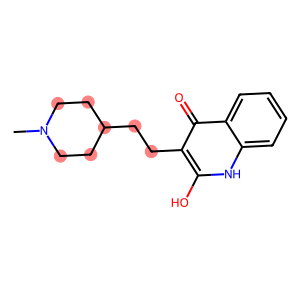

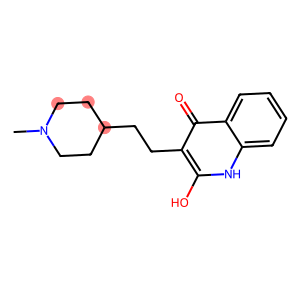

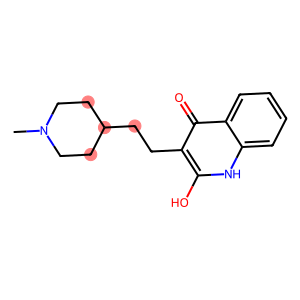

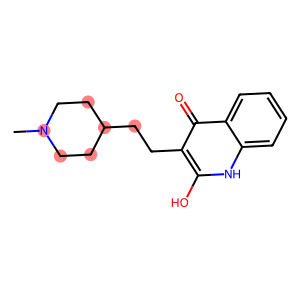

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

# Example fragment DataFrame
fragment_data = {'Fragment_SMILES': ['CCC(CC)CC', '{}', 'CCC', 'CC(C)C', 'CC(C)CCN', '{}', '{}']}
fragment_df = pd.DataFrame(fragment_data)

# Parent SMILES string
parent_smiles = 'CN1CCC(CCc2c(O)[nH]c3ccccc3c2=O)CC1'

# Convert parent SMILES to RDKit molecule object
parent_molecule = Chem.MolFromSmiles(parent_smiles)

# Function to map and highlight fragments on the parent structure
def map_and_highlight_fragments(fragment_smiles):
    if fragment_smiles == '{}':  # Handle empty fragments
        return None

    fragment_molecule = Chem.MolFromSmiles(fragment_smiles)
    if parent_molecule.HasSubstructMatch(fragment_molecule):
        match = parent_molecule.GetSubstructMatch(fragment_molecule)
        highlight_atoms = list(match)
        return Draw.MolToImage(parent_molecule, highlightAtoms=highlight_atoms)
    else:
        return Draw.MolToImage(parent_molecule)  # Return the parent molecule without highlighting if no match

# Generate images with highlighted fragments
fragment_df['Parent_Molecule_Image'] = fragment_df['Fragment_SMILES'].apply(map_and_highlight_fragments)

# Display images of parent structures
for idx, row in fragment_df.iterrows():
    image = row['Parent_Molecule_Image']
    if image:
        display(image)



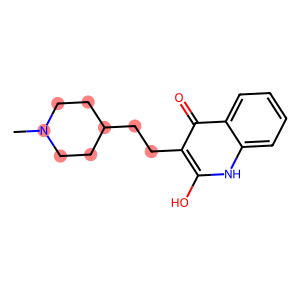

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

# Example fragment DataFrame
fragment_data = {'Fragment_SMILES': ['CCC(CC)CC', '{}', 'CCC', 'CC(C)C', 'CC(C)CCN', '{}', '{}']}
fragment_df = pd.DataFrame(fragment_data)

# Parent SMILES string
parent_smiles = 'CN1CCC(CCc2c(O)[nH]c3ccccc3c2=O)CC1'

# Convert parent SMILES to RDKit molecule object
parent_molecule = Chem.MolFromSmiles(parent_smiles)

# Function to collect highlight indices for fragments
def collect_highlight_indices(fragment_smiles):
    if fragment_smiles == '{}':  # Handle empty fragments
        return []

    fragment_molecule = Chem.MolFromSmiles(fragment_smiles)
    if parent_molecule.HasSubstructMatch(fragment_molecule):
        return list(parent_molecule.GetSubstructMatch(fragment_molecule))
    return []

# Collect all highlight atom indices
all_highlight_indices = []
for fragment in fragment_df['Fragment_SMILES']:
    all_highlight_indices.extend(collect_highlight_indices(fragment))

# Remove duplicates
all_highlight_indices = list(set(all_highlight_indices))

# Generate image with all highlighted fragments
highlighted_image = Draw.MolToImage(parent_molecule, highlightAtoms=all_highlight_indices)

# Display the image
display(highlighted_image)


## Conclusion


The top-performing models from autoML TPOT modeling and aggregate modeling are as follows: GradientBoostingClassifier(RobustScaler(input_matrix), learning_rate=0.1, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.8) for TPOT.
SVM with parameters {'C': 1, 'kernel': 'rbf'} for aggregate modeling respectively.
The model from aggregate modeling demonstrated slightly superior performance compared to TPOT's best pipeline across cross-species and human-independent datasets. Additionally, an example of LIME-based model interpretation illustrated the contribution of one active compound fragment.

## References

* Jiménez-Luna, J., Grisoni, F., & Schneider, G. (2020). Drug discovery with explainable artificial intelligence. Nature Machine Intelligence, 2(10), 573–584. https://doi.org/10.1038/s42256-020-00236-4
* Ribeiro, M. T., Singh, S., & Guestrin, C. (2016). “Why Should I Trust You?”: Explaining the Predictions of Any Classifier (arXiv:1602.04938). arXiv. http://arxiv.org/abs/1602.04938
* Rogers, D., & Hahn, M. (2010). Extended-Connectivity Fingerprints. Journal of Chemical Information and Modeling, 50(5), 742–754. https://doi.org/10.1021/ci100050t
* https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Model_Interpretability.ipynb
*Ramsundar, B., Eastman, P., Walters, P., Pande, V., Leswing, K., & Wu, Z. (2019). Deep Learning for the Life Sciences. O’Reilly Media. https://www.amazon.com/Deep-Learning-Life-Sciences-Microscopy/dp/1492039837
*   Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283